In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = np.array([1,0.5])
x2 = np.array([0.5,3])

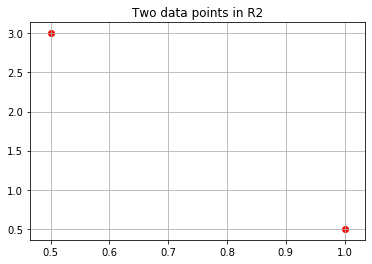

In [20]:
plt.scatter(x1,x2,color='red');
plt.title('Two data points in R2');
plt.grid();

# First layer

In [5]:
weights = np.random.randn(6,)
weights

array([-0.81418323,  1.69336766, -1.62703858,  1.00107241,  0.17245931,
       -1.01359793])

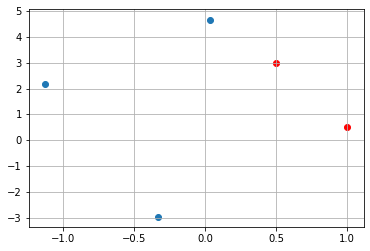

In [6]:
z11 = weights[0]*x1 + weights[1]*x2
z12 = weights[2]*x1 + weights[3]*x2
z13 = weights[4]*x1 + weights[5]*x2

plt.scatter([z11[0],z12[0],z13[0]],[z11[1],z12[1],z13[1]]);
plt.scatter(x1,x2,color = 'red');
plt.grid();

In [7]:
def relu(vector):
    """ Compute max(0,element) component-wise for the input 'vector' """
            
    zero = np.zeros(vector.shape)
        
    return np.array([np.max(element) for element in zip(vector, zero)])

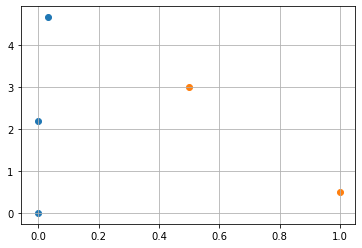

In [8]:
a11 = relu(z11)
a12 = relu(z12)
a13 = relu(z13)

plt.scatter([a11[0],a12[0],a13[0]], [a11[1],a12[1],a13[1]]);
plt.scatter(x1,x2);
plt.grid();

# Second layer

In [9]:
weights = np.random.randn(9,)
weights

array([ 0.98338118,  0.81322923,  0.73534754, -0.35214005,  1.24559372,
       -0.65788703,  0.74057676, -2.7932957 , -0.44740759])

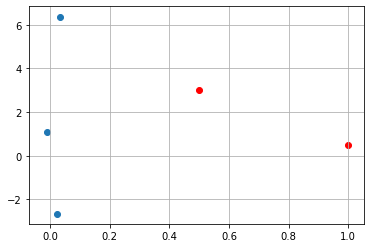

In [10]:
z21 = weights[0]*a11 + weights[1]*a12 + weights[2]*a13
z22 = weights[3]*a11 + weights[4]*a12 + weights[5]*a13
z23 = weights[6]*a11 + weights[7]*a12 + weights[8]*a13

plt.scatter([z21[0],z22[0],z23[0]],[z21[1],z22[1],z23[1]]);
plt.scatter(x1,x2,color = 'red');
plt.grid();

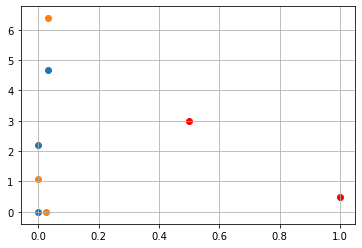

In [13]:
a21 = relu(z21)
a22 = relu(z22)
a23 = relu(z23)

plt.scatter([a11[0],a12[0],a13[0]], [a11[1],a12[1],a13[1]]);
plt.scatter([a21[0],a22[0],a23[0]], [a21[1],a22[1],a23[1]]);
plt.scatter(x1,x2,color='red');
plt.grid();

# Third layer

In [14]:
weights = np.random.randn(9,)
weights

array([-0.07026872, -0.50840441, -0.14929249, -0.01598979, -1.23805692,
       -1.32865869,  0.70480155,  1.59501029,  0.12840593])

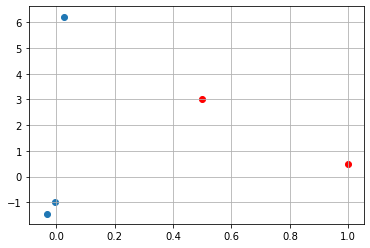

In [15]:
z31 = weights[0]*a21 + weights[1]*a22 + weights[2]*a23
z32 = weights[3]*a21 + weights[4]*a22 + weights[5]*a23
z33 = weights[6]*a21 + weights[7]*a22 + weights[8]*a23

plt.scatter([z31[0],z32[0],z33[0]],[z31[1],z32[1],z33[1]]);
plt.scatter(x1,x2,color = 'red');
plt.grid();

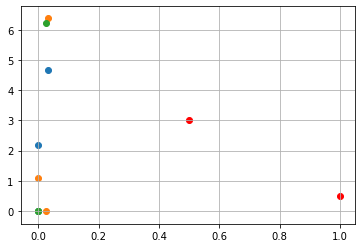

In [16]:
a31 = relu(z31)
a32 = relu(z32)
a33 = relu(z33)

plt.scatter([a11[0],a12[0],a13[0]], [a11[1],a12[1],a13[1]]);
plt.scatter([a21[0],a22[0],a23[0]], [a21[1],a22[1],a23[1]]);
plt.scatter([a31[0],a32[0],a33[0]], [a31[1],a32[1],a33[1]]);
plt.scatter(x1,x2,color='red');
plt.grid();

In [17]:
a11,a12,a13

(array([0.0325006 , 4.67301135]),
 array([0.        , 2.18969795]),
 array([0., 0.]))

In [18]:
a21,a22,a23

(array([0.03196048, 6.37607781]),
 array([0.        , 1.08191956]),
 array([0.02406919, 0.        ]))

In [19]:
a31,a32,a33

(array([0., 0.]), array([0., 0.]), array([0.02561642, 6.21954237]))

Now I'm going to create a dataset of 20000 vectors. In the first class, the x-element is always 0.5. Similarly, the second class has the y-element always 0.5.

In [2]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

batch_size = 100
num_classes = 2

Using TensorFlow backend.


In [3]:
import pandas as pd

half = np.array([0.5]*10000)

x = 3*np.random.rand(20000)

data = pd.DataFrame([x[:10000],half]).T
data.columns = ['x','y']
data

,x,y
0,2.040092,0.5
1,2.658481,0.5
2,0.379241,0.5
3,0.069424,0.5
4,1.268459,0.5
...,...,...
9995,0.169352,0.5
9996,0.218330,0.5
9997,0.425346,0.5
9998,1.500684,0.5


In [4]:
data2 = pd.DataFrame([half, x[10000:]]).T
data2.columns = ['x','y']
data2

,x,y
0,0.5,0.914305
1,0.5,1.267635
2,0.5,1.863490
3,0.5,2.919261
4,0.5,2.256015
...,...,...
9995,0.5,1.477035
9996,0.5,2.571580
9997,0.5,2.410511
9998,0.5,0.536942


In [5]:
dataset = pd.concat([data,data2])
dataset

,x,y
0,2.040092,0.500000
1,2.658481,0.500000
2,0.379241,0.500000
3,0.069424,0.500000
4,1.268459,0.500000
...,...,...
9995,0.500000,1.477035
9996,0.500000,2.571580
9997,0.500000,2.410511
9998,0.500000,0.536942


In [6]:
labels = 10000*[0] + 10000*[1]
dataset['label'] = np.array(labels)
dataset.index = range(len(dataset['x']))
dataset

,x,y,label
0,2.040092,0.500000,0
1,2.658481,0.500000,0
2,0.379241,0.500000,0
3,0.069424,0.500000,0
4,1.268459,0.500000,0
...,...,...,...
19995,0.500000,1.477035,1
19996,0.500000,2.571580,1
19997,0.500000,2.410511,1
19998,0.500000,0.536942,1


In [7]:
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset

,x,y,label
0,1.241290,0.500000,0
1,0.500000,0.673789,1
2,0.999092,0.500000,0
3,0.500000,2.132194,1
4,0.500000,2.016273,1
...,...,...,...
19995,0.500000,2.304772,1
19996,0.500000,1.264424,1
19997,0.500000,0.103721,1
19998,0.323927,0.500000,0


In [82]:
x_train = dataset[['x','y']].loc[:9999]
y_train = dataset['label'].loc[:9999]

x_test = dataset[['x','y']].loc[10000:]
y_test = dataset['label'].loc[10000:]

In [83]:
x_train = x_train.to_numpy()
y_train= y_train.to_numpy()

x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [84]:
model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(2,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 8         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(loss='binary_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [89]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 0s 33us/step - loss: 0.2863 - accuracy: 0.8983 - val_loss: 0.2833 - val_accuracy: 0.8995
Epoch 2/100
10000/10000 [==============================] - 0s 21us/step - loss: 0.2843 - accuracy: 0.8988 - val_loss: 0.2813 - val_accuracy: 0.8999
Epoch 3/100
10000/10000 [==============================] - 0s 20us/step - loss: 0.2823 - accuracy: 0.8995 - val_loss: 0.2795 - val_accuracy: 0.9006
Epoch 4/100
10000/10000 [==============================] - 0s 20us/step - loss: 0.2804 - accuracy: 0.8999 - val_loss: 0.2779 - val_accuracy: 0.9015
Epoch 5/100
10000/10000 [==============================] - 0s 20us/step - loss: 0.2788 - accuracy: 0.9009 - val_loss: 0.2765 - val_accuracy: 0.9016
Epoch 6/100
10000/10000 [==============================] - 0s 20us/step - loss: 0.2773 - accuracy: 0.9008 - val_loss: 0.2751 - val_accuracy: 0.9020
Epoch 7/100
10000/10000 [==============================] - 0s 

Epoch 56/100
10000/10000 [==============================] - 0s 19us/step - loss: 0.2548 - accuracy: 0.9099 - val_loss: 0.2550 - val_accuracy: 0.9096
Epoch 57/100
10000/10000 [==============================] - 0s 20us/step - loss: 0.2546 - accuracy: 0.9100 - val_loss: 0.2549 - val_accuracy: 0.9097
Epoch 58/100
10000/10000 [==============================] - 0s 22us/step - loss: 0.2544 - accuracy: 0.9101 - val_loss: 0.2548 - val_accuracy: 0.9099
Epoch 59/100
10000/10000 [==============================] - 0s 21us/step - loss: 0.2542 - accuracy: 0.9103 - val_loss: 0.2548 - val_accuracy: 0.9089
Epoch 60/100
10000/10000 [==============================] - ETA: 0s - loss: 0.2554 - accuracy: 0.90 - 0s 20us/step - loss: 0.2541 - accuracy: 0.9104 - val_loss: 0.2548 - val_accuracy: 0.9107
Epoch 61/100
10000/10000 [==============================] - 0s 19us/step - loss: 0.2541 - accuracy: 0.9101 - val_loss: 0.2544 - val_accuracy: 0.9099
Epoch 62/100
10000/10000 [==============================] - 0s 2

In [90]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2510310754776001
Test accuracy: 0.9114000201225281
